In [36]:
from music21 import *
import os
import xml.etree.ElementTree as ET
import pandas as pd
from rich import print
import math
import numpy as np
import seaborn as sns

In [2]:
# configure.run()

In [3]:
mscore_path = '/usr/bin/mscore'
us = environment.UserSettings()
us['musicxmlPath'] = mscore_path
us['musescoreDirectPNGPath'] = mscore_path

In [4]:
data_path = './SymbTr'
music_xml_path = os.path.join(data_path, 'MusicXML')
music_xml_nokeysig_path = os.path.join(data_path, 'MusicXML_NoKeySig')

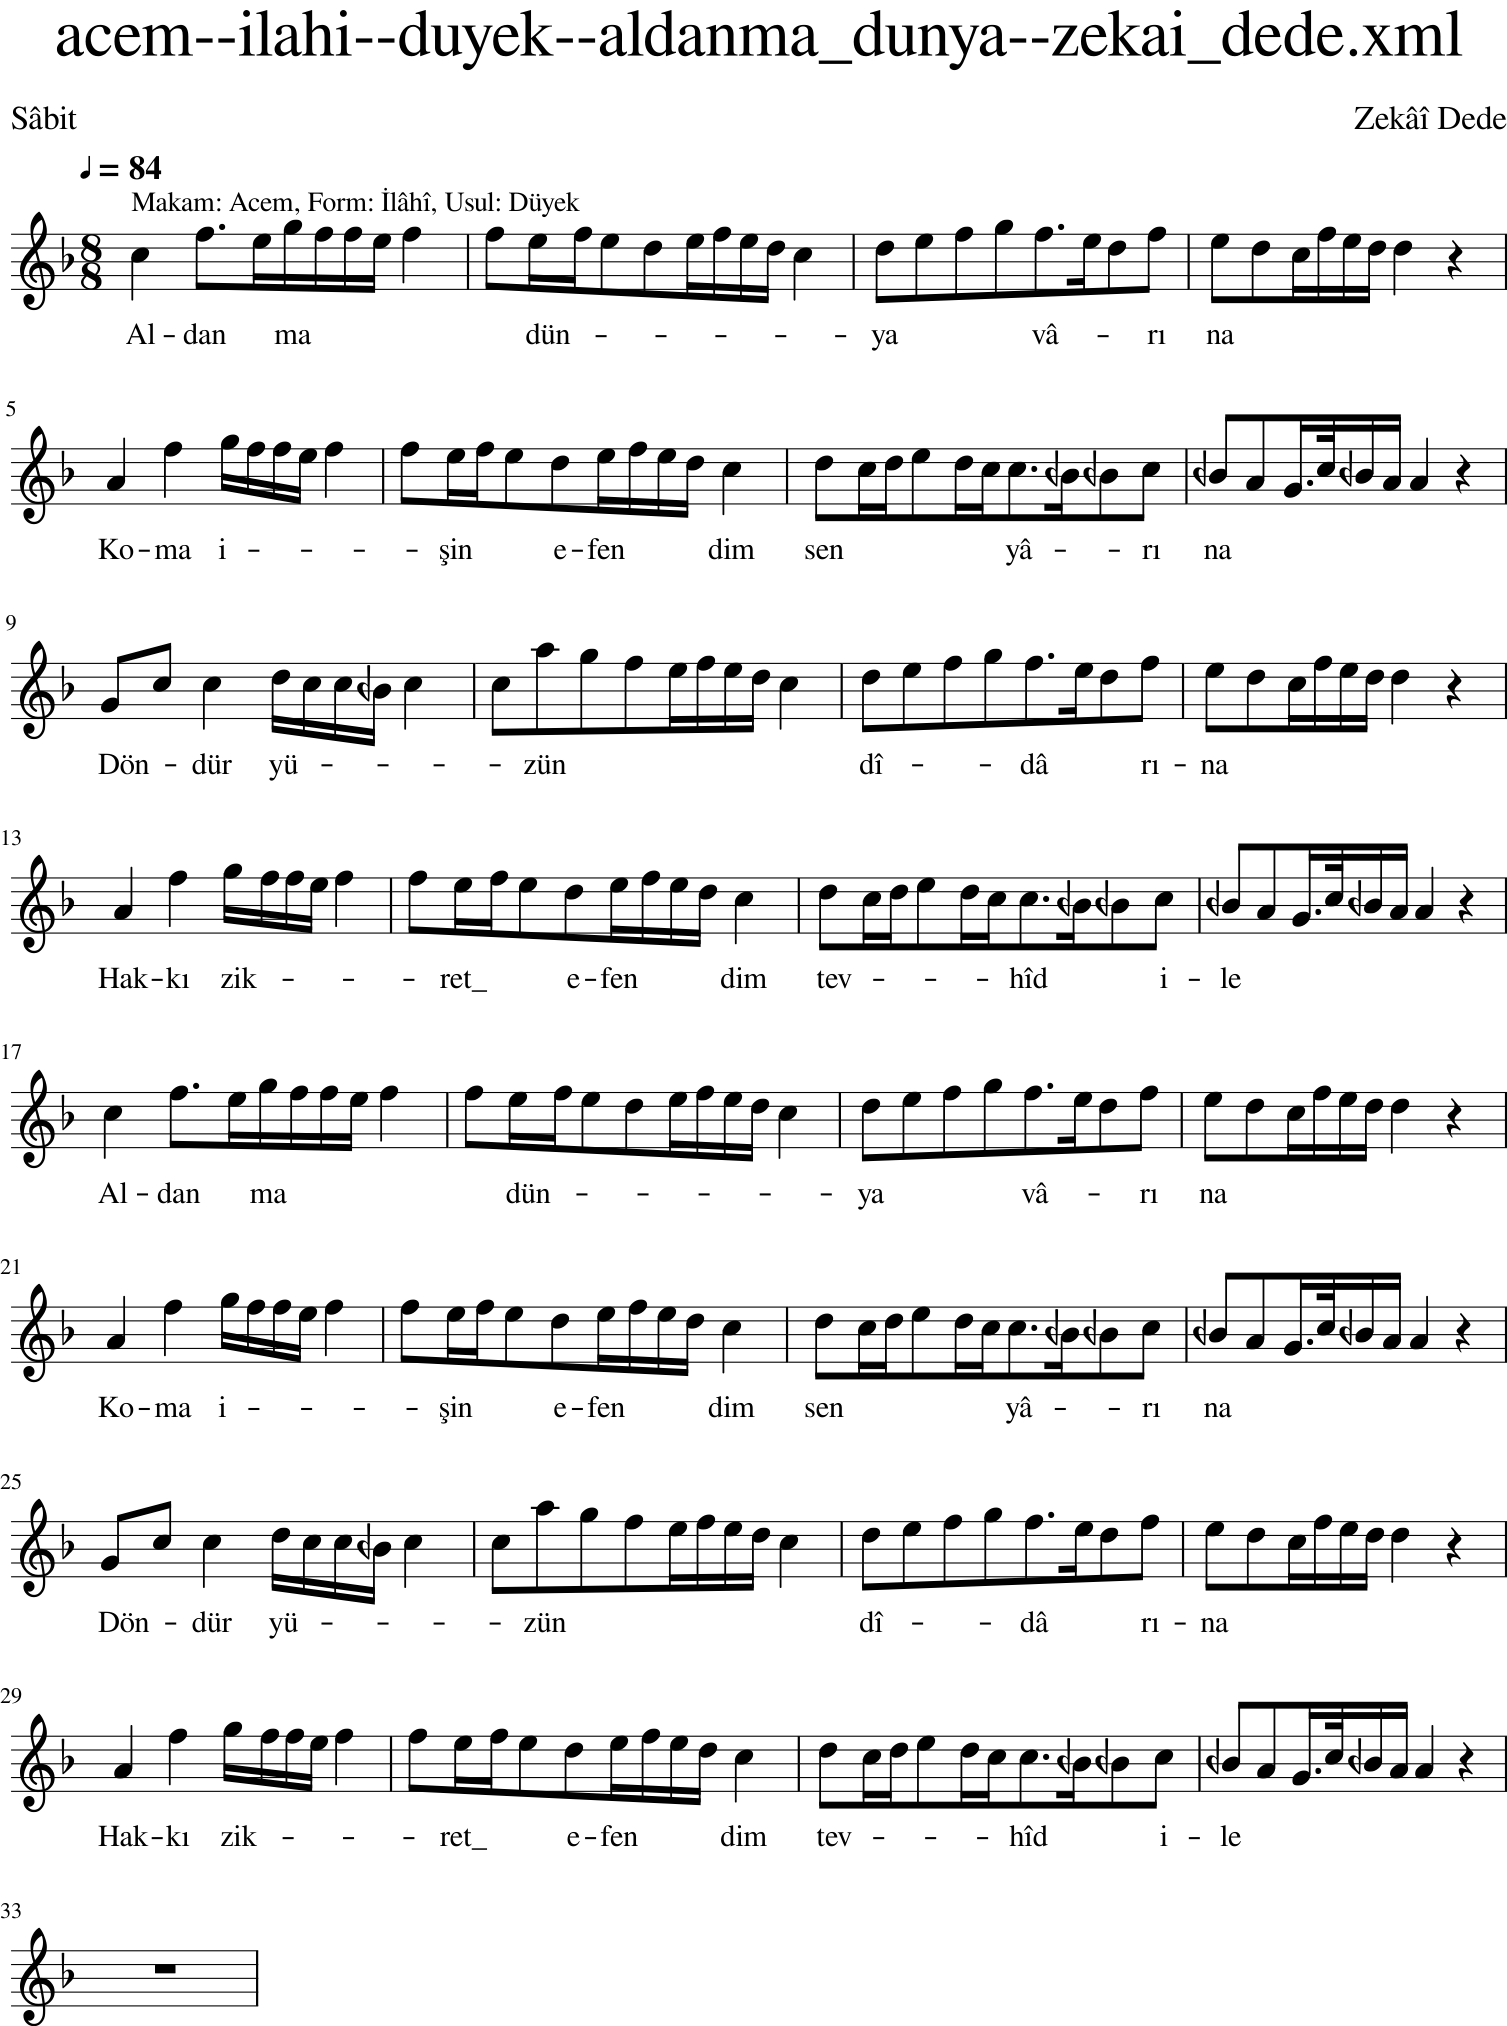

In [5]:
s = converter.parse(music_xml_path + '/acem--ilahi--duyek--aldanma_dunya--zekai_dede.xml')
s.show()

In [6]:
all_scores = os.listdir(music_xml_path)
label_map = {}
for score in all_scores:
    label = score.split('--')[2]
    if label not in label_map:
        label_map[label] = []
    label_map[label].append(score)

In [7]:
sorted_items = sorted(label_map.items(), key=lambda x: len(x[1]), reverse=True)
print(list(zip(label_map.keys(), [len(value) for value in label_map.values()])))

[
    ('nimsofyan', 99),
    ('curcuna', 111),
    ('agiraksak', 108),
    ('agirduyek', 15),
    ('durakevferi', 3),
    ('duyek', 278),
    ('hafif', 19),
    ('sofyan', 293),
    ('senginsemai', 72),
    ('aksak', 319),
    ('sarkidevrirevani', 5),
    ('kapali_curcuna', 49),
    ('yuruksemai', 62),
    ('fahte', 9),
    ('devrirevanihindi', 25),
    ('semai', 100),
    ('turkaksagi', 64),
    ('muhammes', 22),
    ('agirevfer', 13),
    ('evfer', 20),
    ('yuruksemai_ii', 55),
    ('musemmen', 38),
    ('devrihindi_ii', 2),
    ('devrisureyyasofyani', 1),
    ('aksaksemai', 128),
    ('devrikebir', 33),
    ('devrihindi', 58),
    ('agir_aksaksemai', 13),
    ('raksaksagi', 12),
    ('nimdevir', 2),
    ('iki_bir', 2),
    ('ciftesofyan', 14),
    ('bektasidevrirevani', 2),
    ('aydin', 9),
    ('devrituran', 10),
    ('darb', 5),
    ('nimsakil', 1),
    ('raksan', 2),
    ('cifteduyek', 6),
    ('devrituran_ii', 1),
    ('oynak', 11),
    ('agircenber', 7),
    ('cengiharbi', 1),
    ('evsat', 5),
    ('devrisureyya', 1),
    ('tekvurus', 1),
    ('yuruksofyan', 1),
    ('lenkfahte', 3),
    ('darbifetih', 5),
    ('nimevsat', 2),
    ('musemmen_ii', 8),
    ('bektasiraksi', 1),
    ('nimberefsan', 1),
    ('devrirevan', 3),
    ('iraksak', 1),
    ('turkdarbi', 1),
    ('ferimuhammes', 1),
    ('turkmen', 1),
    ('cenber', 9),
    ('berefsan', 3),
    ('ikizaksak', 3),
    ('sakil', 2),
    ('aksaksemaievferi', 2),
    ('agirsenginsemai', 3),
    ('azeriyuruksemai', 6),
    ('fer', 1),
    ('murekkepsofyan', 2),
    ('firengifer', 1),
    ('devriaryan', 1),
    ('zencir', 8),
    ('remel', 2),
    ('dolap', 2),
    ('3334', 1),
    ('katikofti', 1),
    ('ayindevrirevani', 1),
    ('havi', 2),
    ('serbest', 2),
    ('14_4', 1),
    ('nimhafif', 2),
    ('mevlevievferi', 2),
    ('muasser', 1),
    ('bektasiraksani', 1),
    ('frenkcin', 2),
    ('darbeyn', 1),
    ('raksaksagi_ii', 1),
    ('bulgardarbi', 1),
    ('murekkepnimsofyan', 1),
    ('223', 1)
]

In [8]:
if not os.path.exists(music_xml_nokeysig_path):
    beatsDic = {}

    # Create a folder to contain the xml scores without key signature
    os.mkdir(music_xml_nokeysig_path)

    for score in all_scores:
        # print(all_scores.index(score)+1, '- Processing', score)
        
        # Remove the key signature from the xml file
        tree = ET.parse(os.path.join(music_xml_path, score))
        root = tree.getroot()
        
        for att in root.iter('attributes'):
            if att.find('key'):
                att.remove(att.find('key'))
        
        # Save the new xml files to be later loaded with music21
        new_score = os.path.join(music_xml_nokeysig_path, score)
        tree.write(new_score)
        
        # Load the file in music21 and get a stream with all the notes
        s = converter.parse(new_score)
        nn = s.flatten().notes.stream()
        
        # Count the notes per beat
        for n in nn:
            beatsDic[n.beat] = beatsDic.get(n.beat, 0) + 1 # Use the .beat attibute

    print('\nDone!')
else:
    print(f'The folder {music_xml_nokeysig_path} already exists. Skipping the process.')

The folder ./SymbTr/MusicXML_NoKeySig already exists. Skipping the process.

In [9]:
all_new_scores = os.listdir(music_xml_nokeysig_path)
new_label_map = {}
for score in all_new_scores:
    label = score.split('--')[2]
    if label not in new_label_map:
        new_label_map[label] = []
    new_label_map[label].append(score)

In [10]:
# new_sorted_items = sorted(new_label_map.items(), key=lambda x: len(x[1]), reverse=True)
# for key, value in new_sorted_items:
#   time_sigs = set()
#   for score in value:
#     s = converter.parse(music_xml_nokeysig_path + '/' + score)
#     time_signature = s.getTimeSignatures()[0].ratioString
#     time_sigs.add(time_signature)
#   print(key, len(value), time_sigs)

In [11]:
# Get the path to the .xml file
score = "saba--sazsemaisi--aksaksemai----zaharya.xml"
# score = "ussak--sarki--turkaksagi--yalniz_birakip--misirli_udi_ibrahim_efendi.xml"
R_path = os.path.join(music_xml_nokeysig_path, score)

# Data in the filename
filename_data = score.split(".xml")[0].split("--")
R_makam_file = filename_data[0]
R_form_file = filename_data[1]
R_usul_file = filename_data[2]
R_lyrics_file = filename_data[3]
R_composer_file = filename_data[4]

# Load the file in music21
s = converter.parse(R_path)

# Metadata data
m = s.metadata
p = s.parts[0]
measures = p.getElementsByClass(stream.Measure)
R_composer = m.getContributorsByRole("composer")[0].name
R_poet = m.getContributorsByRole("poet")[0].name if m.getContributorsByRole("poet") else None
R_work_title = m.title
R_bar_count = len(measures)
R_music = []

last_makam = None
last_form = None
last_usul = None
last_tempo = None

for m in measures:
    text_expressions = m.getElementsByClass('TextExpression')
    if text_expressions:
        te = text_expressions[0]
        keys = []
        values = []
        for item in te.content.split(','):
            key, value = item.split(': ')
            keys.append(key)
            values.append(value)
        expr = {k.strip(): v.strip() for k, v in zip(keys, values)}
        if expr.get('Makam'): last_makam = expr['Makam']
        if expr.get('Form'): last_form = expr['Form']
        if expr.get('Usul'): last_usul = expr['Usul']

    tempo = m.getElementsByClass('MetronomeMark')
    if tempo:
        t = tempo[0]
        last_tempo = t.number

    time_signature = m.getTimeSignatures()[0]
    R_mi = {
        "time_signature": time_signature.ratioString,
        "makam": last_makam,
        "tempo": last_tempo,
        "usul": last_usul,
        "form": last_form,
        "notes": [],
        "beat_data": [0] * time_signature.numerator,
    }
    beat_n = 0
    duration_sum = 0

    for n in m.notes:
        if n.duration.isGrace: continue
        if n.isNote:
            R_mi["beat_data"][beat_n] += 1
        duration = n.duration.quarterLength
        duration_sum += duration
        beat_n = math.floor(duration_sum * 96 / (384 / time_signature.denominator)) # TODO: do not hardcode

        R_mi["notes"].append({
            "step": n.step,
            "octave": n.octave,
            # "lyric": n.lyric if n.lyric else None,
            "duration": duration,
        })
    
    R_music.append(R_mi)

# Create a dictionary with the results
result = {
    'path': R_path,
    'makam_file': R_makam_file,
    'form_file': R_form_file,
    'usul_file': R_usul_file,
    'lyrics_file': R_lyrics_file,
    'composer_file': R_composer_file,
    'composer': R_composer,
    'poet': R_poet,
    'work_title': R_work_title,
    'bar_count': R_bar_count,
    'music': R_music,
}

# print(result)

In [12]:
# TODO: compute distances

# music = result['music']
# full_beat_data = []
# for i, mi in enumerate(music):
#     full_beat_data += mi['beat_data']
# print(full_beat_data)

In [13]:
df_columns = [
    'path',
    'makam_file',
    'form_file',
    'usul_file',
    'lyrics_file',
    'composer_file',
    'composer',
    'poet',
    'work_title',
    'bar_count',
    'music',
]
df = pd.DataFrame(columns=df_columns)

all_scores = os.listdir(music_xml_nokeysig_path)
for score in all_scores:
    R_path = os.path.join(music_xml_nokeysig_path, score)

    # Data in the filename
    filename_data = score.split(".xml")[0].split("--")
    R_makam_file = filename_data[0]
    R_form_file = filename_data[1]
    R_usul_file = filename_data[2]
    R_lyrics_file = filename_data[3]
    R_composer_file = filename_data[4]

    # Load the file in music21
    s = converter.parse(R_path)

    # Metadata data
    m = s.metadata
    p = s.parts[0]
    measures = p.getElementsByClass(stream.Measure)
    R_composer = m.getContributorsByRole("composer")[0].name
    R_poet = m.getContributorsByRole("poet")[0].name if m.getContributorsByRole("poet") else None
    R_work_title = m.title
    R_bar_count = len(measures)
    R_music = []

    last_makam = None
    last_form = None
    last_usul = None
    last_tempo = None


    try:
        for m in measures:
            text_expressions = m.getElementsByClass('TextExpression')
            if text_expressions:
                te = text_expressions[0]
                keys = []
                values = []
                for item in te.content.split(','):
                    key, value = item.split(': ')
                    keys.append(key)
                    values.append(value)
                expr = {k.strip(): v.strip() for k, v in zip(keys, values)}
                if expr.get('Makam'): last_makam = expr['Makam']
                if expr.get('Form'): last_form = expr['Form']
                if expr.get('Usul'): last_usul = expr['Usul']

            tempo = m.getElementsByClass('MetronomeMark')
            if tempo:
                t = tempo[0]
                last_tempo = t.number

            time_signature = m.getTimeSignatures()[0]
            R_mi = {
                "time_signature": time_signature.ratioString,
                "makam": last_makam,
                "tempo": last_tempo,
                "usul": last_usul,
                "form": last_form,
                "notes": [],
                "beat_data": [0] * time_signature.numerator,
            }
            beat_n = 0
            duration_sum = 0

            for n in m.notes:
                if n.duration.isGrace: continue
                if n.isNote:
                    R_mi["beat_data"][beat_n] += 1
                duration = n.duration.quarterLength
                duration_sum += duration
                beat_n = math.floor(duration_sum * 96 / (384 / time_signature.denominator)) # TODO: do not hardcode

                R_mi["notes"].append({
                    "step": n.step,
                    "octave": n.octave,
                    # "lyric": n.lyric if n.lyric else None,
                    "duration": duration,
                })
            
            R_music.append(R_mi)
    except Exception as e:
        print(f'Error processing {R_path}: {e}')
        continue

    # Create a dictionary with the results
    new_row = {
        'path': R_path,
        'makam_file': R_makam_file,
        'form_file': R_form_file,
        'usul_file': R_usul_file,
        'lyrics_file': R_lyrics_file,
        'composer_file': R_composer_file,
        'composer': R_composer,
        'poet': R_poet,
        'work_title': R_work_title,
        'bar_count': R_bar_count,
        'music': R_music,
    }

    # Append the new row to the dataframe
    df = pd.concat([df, pd.DataFrame([new_row], columns=df_columns)], ignore_index=True)

Error processing ./SymbTr/MusicXML_NoKeySig/saba--miraciye--serbest--pes_heman--nayi_osman_dede.xml: list index out
of range

In [18]:
# print the head of the dataframe
print(df.head())



path     makam_file form_file  \
0  ./SymbTr/MusicXML_NoKeySig/hicaz--sarki--nimso...          hicaz     sarki   
1  ./SymbTr/MusicXML_NoKeySig/muhayyerkurdi--sark...  muhayyerkurdi     sarki   
2  ./SymbTr/MusicXML_NoKeySig/nihavent--sarki--ag...       nihavent     sarki   
3  ./SymbTr/MusicXML_NoKeySig/hicaz--beste--agird...          hicaz     beste   
4  ./SymbTr/MusicXML_NoKeySig/ussak--sarki--curcu...          ussak     sarki   

   usul_file      lyrics_file      composer_file           composer  \
0  nimsofyan      yar_saclari  yesari_asim_arsoy  Yesârî Âsım Arsoy   
1    curcuna   bakisi_cagirir   selahaddin_pinar   Selahaddin Pınar   
2  agiraksak     akibet_viran          numan_aga          Numan Ağa   
3  agirduyek        ey_cesm-i        dede_efendi        Dede Efendi   
4    curcuna  hastasin_zannim          sevki_bey          Şevki Bey   

                 poet                       work_title bar_count  \
0   Yesârî Âsım Arsoy            Yâr Saçları Lüle Lüle       145   
1     Fuad Edip Baksı      Bakışı Çağırır Beni Uzaktan        82   
2                   ?                     Akıbet Viran        32   
3  Kadı Mehmet Riyâzî                    Ey Çeşm-I Âhû        53   
4    Mehmed Hafîd Bey  Hastasın Zannım Vefâ Mahzunusun        56   

                                               music  
0  [{'time_signature': '2/4', 'makam': 'Hicaz', '...  
1  [{'time_signature': '10/8', 'makam': 'Muhayyer...  
2  [{'time_signature': '9/4', 'makam': 'Nihâvent'...  
3  [{'time_signature': '8/4', 'makam': 'Hicaz', '...  
4  [{'time_signature': '10/8', 'makam': 'Uşşak', ...

In [51]:
# filter the dataframe taking following usul: aksak, curcuna, duyek, semai, sofyan, turkaksagi
df_filtered = df[df['usul_file'].isin(['aksak', 'curcuna', 'duyek', 'semai', 'sofyan', 'turkaksagi'])]
# print(df_filtered.head())

# print the number of rows in the filtered dataframe
# print(len(df_filtered))

#
for row in df_filtered.iterrows():
    music = row[1]['music']
    full_beat_data = {
        music[0]['usul']: music[0]['beat_data']
    }
    for m in music[1:]:
        full_beat_data[m['usul']] = list(np.add(full_beat_data[m['usul']], m['beat_data']))
    mean_diff = full_beat_data/len(music)
    print(mean_diff)
    # plot a barplot of mean_diff array
    sns.barplot(x=np.arange(len(mean_diff)), y=mean_diff)




# # print the value of beat data for every measure of the first row in the filtered dataframe
# music = df_filtered.iloc[0]['music']
# full_beat_data = {
#     music[0]['usul']: music[0]['beat_data']
# }
# for m in music[1:]:
#     # print(m['usul'])
#     full_beat_data[m['usul']] = list(np.add(full_beat_data[m['usul']], m['beat_data']))
   
# print(full_beat_data)
# # mean_diff = full_beat_data/len(music)

# # print(mean_diff)
# # plot a barplot of mean_diff array
# # sns.barplot(x=np.arange(len(mean_diff)), y=mean_diff)






    


KeyError: 'Aksak'